<a href="https://colab.research.google.com/github/asangphukieo/Gut_microbiota_workshop_CMUTEAM_2022/blob/main/7_Microbiota_diversity_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microbiota diversity visualization in R 

### Note: use this link to create a new R notebook https://colab.research.google.com/notebook#create=true&language=r

## 1. Install required library

In [3]:
if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
## install core packages
BiocManager::install()
## install specific packages
BiocManager::install(c("devtools","vegan","phyloseq","ggplot2","ape","ggpubr","dplyr"))

Loading required namespace: BiocManager

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion'

Old packages: 'devtools', 'pillar', 'roxygen2', 'tibble', 'tidyverse', 'MASS',
  'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'ggplot2' 'dplyr'”
Installing package(s) 'devtools', 'vegan', 'phyloseq', 'ape', 'ggpubr'

also installing the dependencies ‘bitops’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’,

In [5]:
BiocManager::install(c("tidyr"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'tidyr'”
Old packages: 'devtools', 'pillar', 'roxygen2', 'tibble', 'tidyverse', 'MASS',
  'nlme'



In [6]:
#Call library
library(vegan)
library(phyloseq)
library(ggplot2)
library(ape)
library(ggpubr)
library(dplyr)
library(tidyr)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. Download/upload data from previous steps (from QIIME2)

In [9]:
#results from QIIME2 
system("wget https://figshare.com/ndownloader/files/36566004 -O level-2.csv")
system("wget https://figshare.com/ndownloader/files/36566001 -O level-6.csv")

#manually modified level-6.csv using Excel
system("wget https://figshare.com/ndownloader/files/36565998 -O taxonomy-genus.txt")

#metadata (manually prepared)
system("wget https://figshare.com/ndownloader/files/36566034 -O 00.sample-metadata.tsv")

#Note: you can also upload your own data from QIIME2 results (level-2.csv, level-6.csv) to use in this tutorial

## 4. Import abundance tables

In [11]:
taxTabP = read.csv("level-2.csv", row.names = 1, check.names = F)
taxTabG = read.csv("level-6.csv", row.names = 1, check.names = F)

## 5. Formating to matrix

In [12]:
taxMatP = t(as.matrix(taxTabP))
taxMatG = t(as.matrix(taxTabG))

In [13]:
head(taxMatP)
head(taxMatG)

,P10_V1,P9_V1,P8_V1,P7_V1,P6_V1,P5_V1,P4_V1,P9_V3,P8_V3,P6_V3,⋯,P10_V2,P9_V2,P8_V2,P7_V2,P4_V2,P3_V2,P2_V2,P1_V2,P2_V1,P1_V1
d__Bacteria;p__Bacteroidota,45,19700,19503,21174,16192,11384,23157,21352,18156,9488,⋯,92,26032,13630,822,24416,3,2912,26361,25364,28409
d__Bacteria;p__Firmicutes,884,21405,9092,7270,17615,17138,15309,17174,17335,10695,⋯,30063,14350,18695,28138,9382,31836,4874,9603,11637,12382
d__Bacteria;p__Proteobacteria,41498,545,8758,11535,7978,14111,4115,1006,7199,22526,⋯,12010,693,1469,6379,8879,56,381,5939,737,1549
d__Bacteria;p__Verrucomicrobiota,13,11,5105,2605,19,6,121,21,0,0,⋯,0,25,8829,5374,9,2,29813,2,4869,0
d__Bacteria;p__Spirochaetota,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,10529,0,0,0,0
d__Bacteria;p__Actinobacteriota,3,89,262,112,204,26,66,2065,43,0,⋯,392,399,78,1752,0,29,4553,70,108,19


,P10_V1,P9_V1,P8_V1,P7_V1,P6_V1,P5_V1,P4_V1,P9_V3,P8_V3,P6_V3,⋯,P10_V2,P9_V2,P8_V2,P7_V2,P4_V2,P3_V2,P2_V2,P1_V2,P2_V1,P1_V1
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,38,16028,19502,17338,4105,270,22757,13186,18146,9488,⋯,54,15172,13618,511,24386,3,2645,26017,24255,25499
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus,380,0,14,262,7,261,29,2,63,40,⋯,27583,68,9663,11,4764,23460,11,13,0,0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella,41497,193,8609,10648,952,4404,935,288,1307,3933,⋯,11978,251,256,10,33,0,79,5234,334,1502
d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,13,11,5105,2605,4,6,121,0,0,0,⋯,0,0,8829,5374,9,2,29813,2,4869,0
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium,5,208,226,171,443,5768,4761,243,434,107,⋯,3,93,7081,816,0,0,1291,389,1342,1023
d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Sphaerochaeta,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,10358,0,0,0,0


## 6. Import metadata

In [15]:
metaTab = read.table("00.sample-metadata.tsv", header = T, sep = "\t", check.names = F)

In [16]:
head(metaTab)

,sample-id,patient-id,gender,age,time-to-neutropenia,microbiological-defined-events
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,SRR12595782,P1_V1,male,41,9,none
2,SRR12595780,P1_V2,male,41,9,none
3,SRR12595759,P10_V1,female,20,10,IPA
4,SRR12595772,P10_V2,female,20,10,IPA
5,SRR12595781,P2_V1,female,37,13,none
6,SRR12595779,P2_V2,female,37,13,none


In [17]:
metaTab = metaTab[,2:6]
rownames(metaTab) = metaTab[,'patient-id']

In [18]:
head(metaTab)

,patient-id,gender,age,time-to-neutropenia,microbiological-defined-events
,<chr>,<chr>,<int>,<int>,<chr>
P1_V1,P1_V1,male,41,9,none
P1_V2,P1_V2,male,41,9,none
P10_V1,P10_V1,female,20,10,IPA
P10_V2,P10_V2,female,20,10,IPA
P2_V1,P2_V1,female,37,13,none
P2_V2,P2_V2,female,37,13,none


In [19]:
## Remove failed sample id from the metadata table
i = which(rownames(metaTab) == 'P5_V2')
metaTab = metaTab[-i,]

In [20]:
dim(metaTab)

[1] 23  5

## 7. Import taxonomy

In [22]:
annTaxG = read.table("taxonomy-genus.txt", header = T, sep = "\t", row.names = 1, check.names = F)
annMatG = as.matrix(annTaxG)

In [23]:
OTU = otu_table(taxMatG, taxa_are_rows = T)
TAX = tax_table(annMatG) 
SAM = sample_data(metaTab)

In [24]:
head(OTU)

,P10_V1,P9_V1,P8_V1,P7_V1,P6_V1,P5_V1,P4_V1,P9_V3,P8_V3,P6_V3,⋯,P10_V2,P9_V2,P8_V2,P7_V2,P4_V2,P3_V2,P2_V2,P1_V2,P2_V1,P1_V1
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,38,16028,19502,17338,4105,270,22757,13186,18146,9488,⋯,54,15172,13618,511,24386,3,2645,26017,24255,25499
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus,380,0,14,262,7,261,29,2,63,40,⋯,27583,68,9663,11,4764,23460,11,13,0,0
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella,41497,193,8609,10648,952,4404,935,288,1307,3933,⋯,11978,251,256,10,33,0,79,5234,334,1502
d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,13,11,5105,2605,4,6,121,0,0,0,⋯,0,0,8829,5374,9,2,29813,2,4869,0
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium,5,208,226,171,443,5768,4761,243,434,107,⋯,3,93,7081,816,0,0,1291,389,1342,1023
d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Sphaerochaeta,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,10358,0,0,0,0


In [25]:
head(TAX)

,Domain,Phylum,Class,Order,Family,Genus
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Enterococcaceae,g__Enterococcus
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia-Shigella
d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Akkermansiaceae;g__Akkermansia,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,f__Akkermansiaceae,g__Akkermansia
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoclostridium,d__Bacteria,p__Firmicutes,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Lachnoclostridium
d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Spirochaetales;f__Spirochaetaceae;g__Sphaerochaeta,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Sphaerochaeta


In [26]:
head(SAM)

,patient.id,gender,age,time.to.neutropenia,microbiological.defined.events
,<chr>,<chr>,<int>,<int>,<chr>
P1_V1,P1_V1,male,41,9,none
P1_V2,P1_V2,male,41,9,none
P10_V1,P10_V1,female,20,10,IPA
P10_V2,P10_V2,female,20,10,IPA
P2_V1,P2_V1,female,37,13,none
P2_V2,P2_V2,female,37,13,none


## 8. Create Phyloseq object

In [27]:
OTU = otu_table(taxMatG, taxa_are_rows = T)
TAX = tax_table(annMatG) 
SAM = sample_data(metaTab)
PLS = phyloseq(OTU, TAX, SAM)
random_tree = rtree(ntaxa(PLS), rooted = T, tip.label = taxa_names(PLS)) 
PLS = merge_phyloseq(PLS, random_tree)

In [28]:
PLS

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 195 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 195 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 195 tips and 194 internal nodes ]

## 9. Stacked Bar Plot

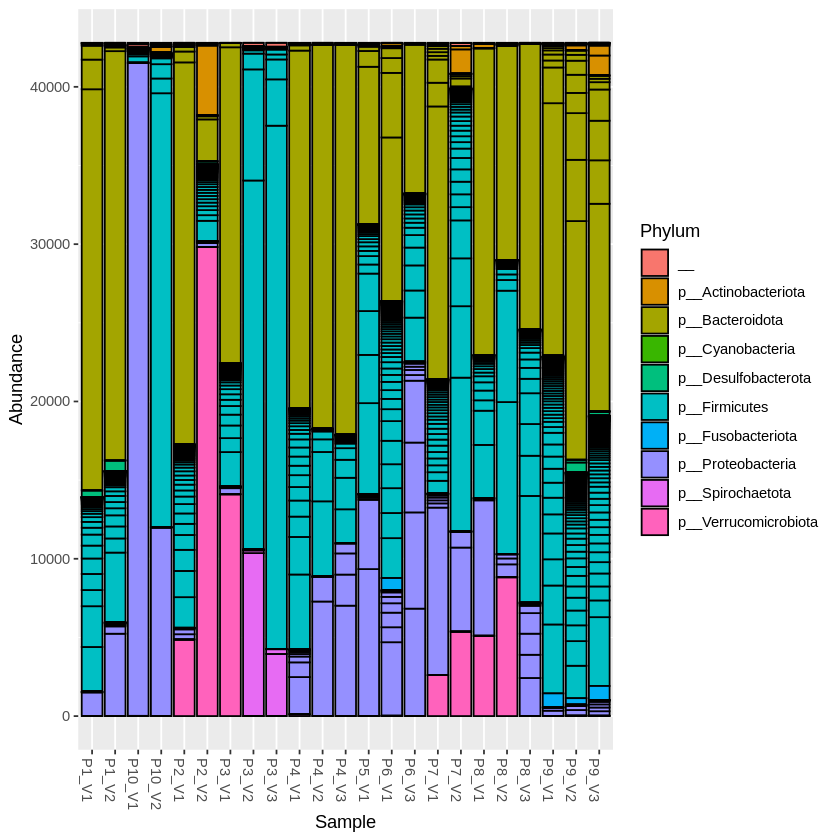

In [29]:
plot_bar(PLS, fill = "Phylum")

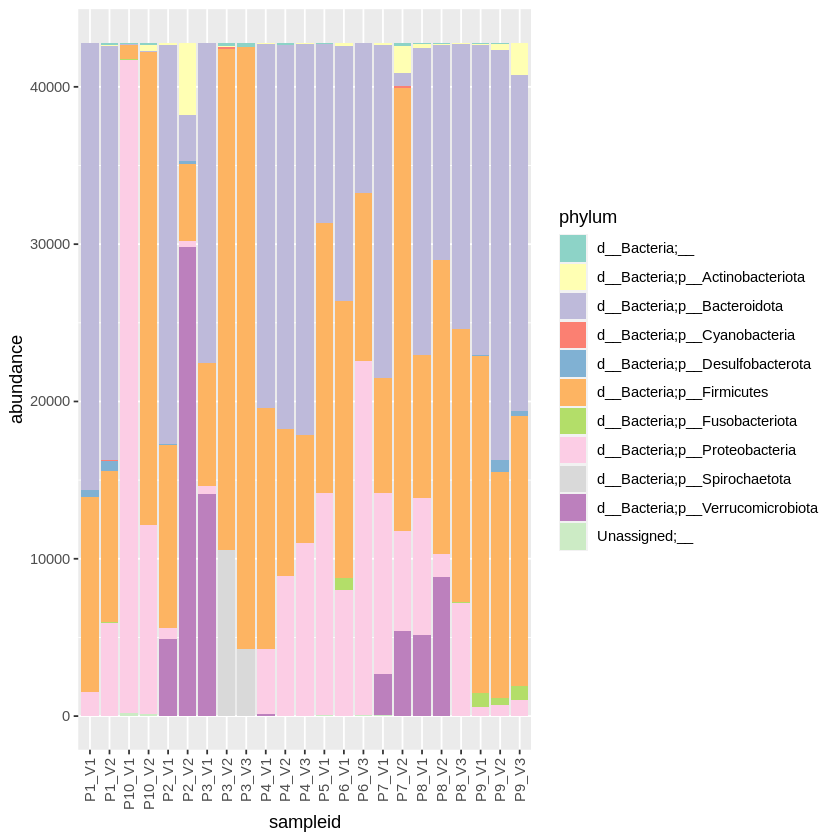

In [30]:
## Convert wide form to long form
library(tidyr)

taxTabP[,'sampleid'] = rownames(taxTabP)

taxDatP = gather(taxTabP, phylum, abundance, "d__Bacteria;p__Bacteroidota":"Unassigned;__")

ggplot(taxDatP, aes(x = sampleid, y = abundance, fill = phylum)) +
    geom_bar(position = 'stack', stat = 'identity') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
    scale_fill_brewer(palette = "Set3")

In [31]:
## Get number of taxa
ntaxa(PLS)

[1] 195

In [32]:
## Get number of samples 
nsamples(PLS)

[1] 23

In [33]:
sample_names(PLS)

[1] "P10_V1" "P9_V1"  "P8_V1"  "P7_V1"  "P6_V1"  "P5_V1"  "P4_V1"  "P9_V3" 
 [9] "P8_V3"  "P6_V3"  "P4_V3"  "P3_V1"  "P3_V3"  "P10_V2" "P9_V2"  "P8_V2" 
[17] "P7_V2"  "P4_V2"  "P3_V2"  "P2_V2"  "P1_V2"  "P2_V1"  "P1_V1"

In [34]:
rank_names(PLS)

[1] "Domain" "Phylum" "Class"  "Order"  "Family" "Genus"

In [35]:
sample_variables(PLS)

[1] "patient.id"                     "gender"                        
[3] "age"                            "time.to.neutropenia"           
[5] "microbiological.defined.events"

In [36]:
otu_table(PLS)[1:3, 1:3]

,P10_V1,P9_V1,P8_V1
Unassigned;__;__;__;__;__,214,13,24
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,0,1,0
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Sellimonas,0,0,0


In [37]:
tax_table(PLS)[1:3, 1:3]

,Domain,Phylum,Class
Unassigned;__;__;__;__;__,Unassigned,__,__
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria,p__Firmicutes,c__Bacilli
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Sellimonas,d__Bacteria,p__Firmicutes,c__Clostridia


In [38]:
phy_tree(PLS)


Phylogenetic tree with 195 tips and 194 internal nodes.

Tip labels:
  Unassigned;__;__;__;__;__, d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus, d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Sellimonas, d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__, d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium, d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter, ...

Rooted; includes branch lengths.

## 10. Calculate alpha diversity

* Shannon's diversity index
* Simpson's diversity index
* Chao1 index
* Pielou's evenness index
* Faith's phylogenetic distance
* Observed feature

In [39]:
shannonVec <- diversity(taxMatG, MARGIN = 2, index = "shannon")
simpsonVec <- diversity(taxMatG, MARGIN = 2, index = "simpson")
chao1Vec <- estimateR(t(taxMatG))['S.chao1',]
observedVec <- specnumber(t(taxMatG))
pielouVec = shannonVec/log(observedVec)
#faithVec = estimate_pd(PLS)[,'PD']

In [40]:
# Export table of alpha diversity
write.table(cbind(observedVec, shannonVec, simpsonVec, pielouVec), "[report] alpha_diversity.csv", sep=",", quote=F, row.names = T)

## 11. Alpha diversity significance test

In [41]:
## Create a data frame of alpha diversity and variables to be compared
dat = data.frame(shannon = shannonVec, 
                simpson = simpsonVec, 
                pielou = pielouVec, 
                #faith = faithVec, 
                events = metaTab[,'microbiological-defined-events'], 
                gender = metaTab[,'gender'])

In [42]:
wilcox.test(shannon ~ gender, data = dat)
wilcox.test(shannon ~ events, data = dat)


	Wilcoxon rank sum exact test

data:  shannon by gender
W = 52, p-value = 0.6355
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  shannon by events
W = 56, p-value = 1
alternative hypothesis: true location shift is not equal to 0


In [43]:
wilcox.test(simpson ~ gender, data = dat)
wilcox.test(simpson ~ events, data = dat)


	Wilcoxon rank sum exact test

data:  simpson by gender
W = 50, p-value = 0.5479
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  simpson by events
W = 60, p-value = 0.8195
alternative hypothesis: true location shift is not equal to 0


In [44]:
wilcox.test(pielou ~ gender, data = dat)
wilcox.test(pielou ~ events, data = dat)


	Wilcoxon rank sum exact test

data:  pielou by gender
W = 53, p-value = 0.6813
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  pielou by events
W = 57, p-value = 0.974
alternative hypothesis: true location shift is not equal to 0


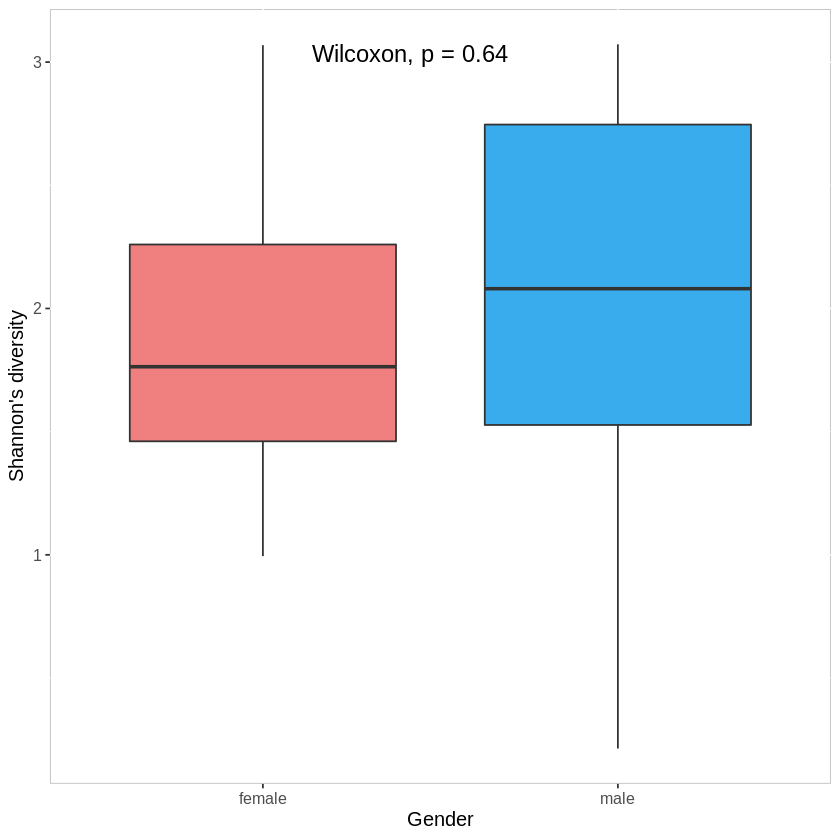

In [45]:
p1 = ggplot(dat, aes(x = gender, y = shannon, fill = gender)) + 
    geom_boxplot() + 
    stat_compare_means(method = "wilcox.test", size = 5, label.x = 1.25, label.y = 3) + 
    xlab("Gender") + 
    ylab("Shannon's diversity") + 
    scale_fill_manual(values = c('#F08080', '#38ACEC')) + 
    theme(panel.background = element_rect(fill='white', colour = "grey"),
          plot.background = element_rect(fill='transparent', color = NA),
          legend.position = "none", text = element_text(size = 12))
p1

In [56]:
#Save image to file
ggsave('shanon-boxplot_gender.png',dpi=500)

Saving 6.67 x 6.67 in image



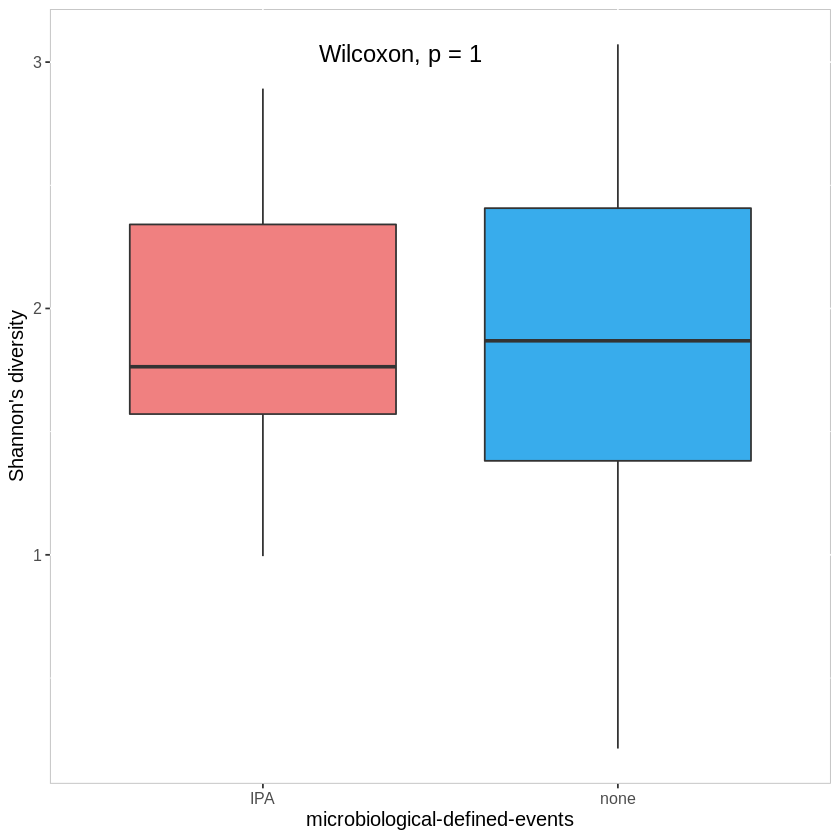

In [46]:
p2 = ggplot(dat, aes(x = events, y = shannon, fill = events)) + 
    geom_boxplot() + 
    stat_compare_means(method = "wilcox.test", size = 5, label.x = 1.25, label.y = 3) + 
    xlab("microbiological-defined-events") + 
    ylab("Shannon's diversity") + 
    scale_fill_manual(values = c('#F08080', '#38ACEC')) + 
    theme(panel.background = element_rect(fill='white', colour = "grey"),
          plot.background = element_rect(fill='transparent', color = NA),
          legend.position = "none", text = element_text(size = 12))
p2

In [55]:
#Save image to file
ggsave('shanon-boxplot_event.png',dpi=500)

Saving 6.67 x 6.67 in image



## 12. Beta diversity significance test

* Bray-Curtis distance
* Jaccard distance
* Unweighted Unifrac distance
* Weighted Unifrac distance

In [47]:
ord.bray = ordinate(PLS, "PCoA", "bray")
ord.jacc = ordinate(PLS, "PCoA", "jaccard")
ord.unif = ordinate(PLS, "PCoA", "unifrac")
ord.wuni = ordinate(PLS, "PCoA", "wunifrac")

In [48]:
eigen.bray <- data.frame(ord.bray$vectors, gender = metaTab[,'gender'], events = metaTab[,'microbiological-defined-events'])
eigen.jacc <- data.frame(ord.jacc$vectors, gender = metaTab[,'gender'], events = metaTab[,'microbiological-defined-events'])
eigen.unif <- data.frame(ord.unif$vectors, gender = metaTab[,'gender'], events = metaTab[,'microbiological-defined-events'])
eigen.wuni <- data.frame(ord.wuni$vectors, gender = metaTab[,'gender'], events = metaTab[,'microbiological-defined-events'])


In [59]:
#PEMANOVA test
PLS.bray = distance(PLS, method = "bray")
adonis2(PLS.bray ~ gender, data = metaTab, permutation = 9999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gender,1,0.1485221,0.02365678,0.5088296,0.897
Residual,21,6.1296837,0.97634322,NA,NA
Total,22,6.2782059,1.00000000,NA,NA


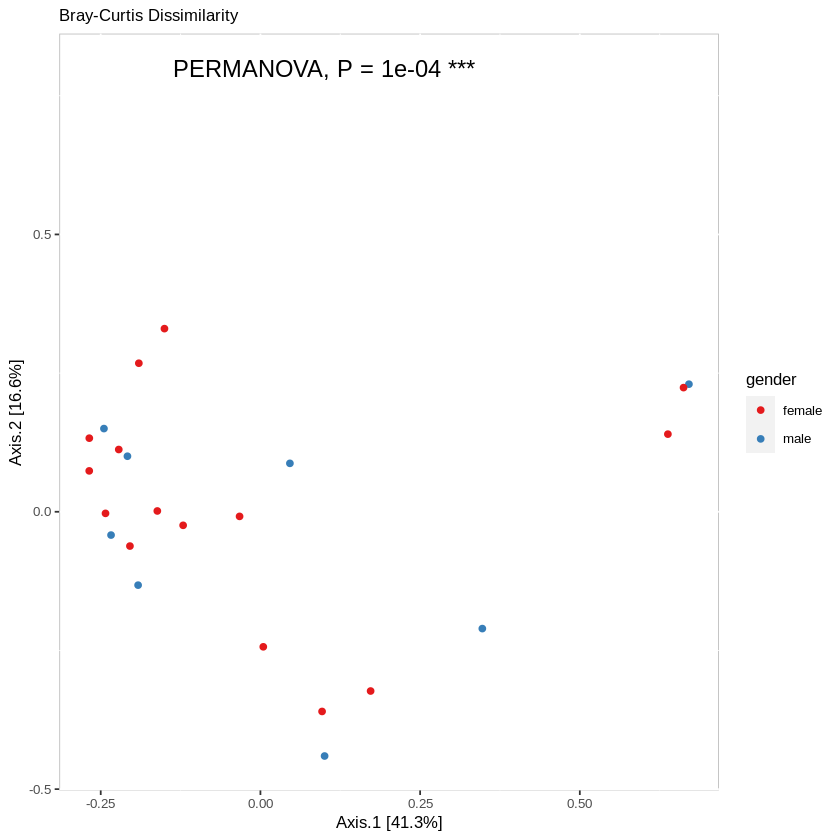

In [49]:
ggplot(eigen.bray, aes(x=Axis.1, y=Axis.2, color=gender)) +
    geom_point() +
    scale_color_brewer(palette = "Set1") +
    labs(subtitle="Bray-Curtis Dissimilarity", x="Axis.1 [41.3%]", y="Axis.2 [16.6%]", color = "gender") +
    annotate("text", label = "PERMANOVA, P = 1e-04 ***", x = 0.1, y = 0.8, size = 5, colour = "black") +
    theme(panel.background = element_rect(fill='white', colour = "grey"),
          plot.background = element_rect(fill='transparent', color = NA),
          legend.position = "right", text = element_text(size = 10))

In [ ]:
ggsave('Bray-Curtis_Dissimilarity_gender.png',dpi=500)

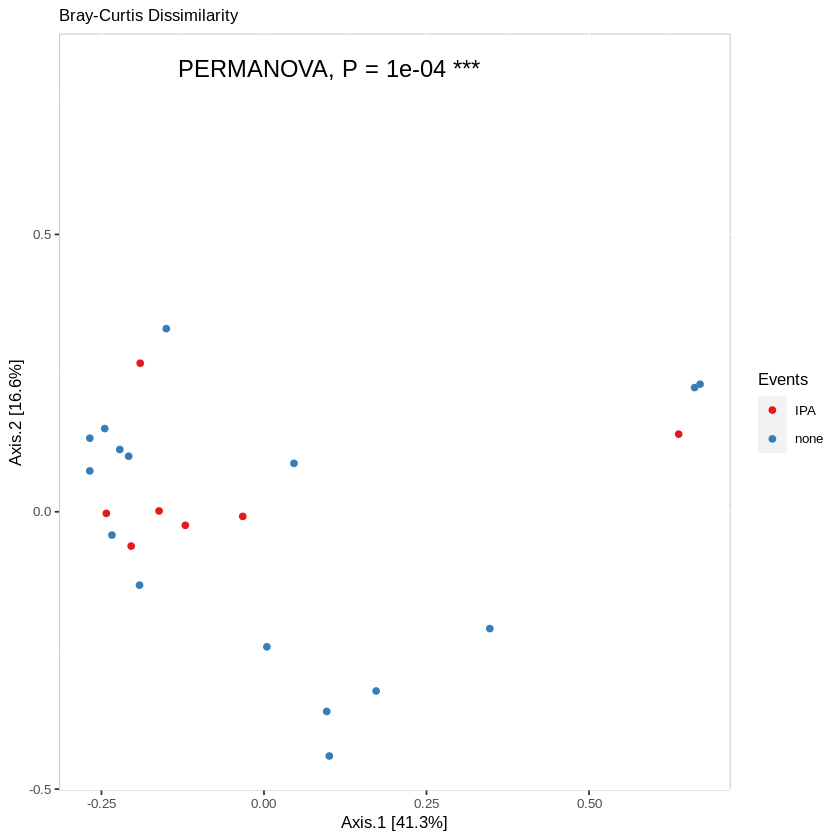

In [50]:
ggplot(eigen.bray, aes(x=Axis.1, y=Axis.2, color=events)) +
    geom_point() +
    scale_color_brewer(palette = "Set1") +
    labs(subtitle="Bray-Curtis Dissimilarity", x="Axis.1 [41.3%]", y="Axis.2 [16.6%]", color = "Events") +
    annotate("text", label = "PERMANOVA, P = 1e-04 ***", x = 0.1, y = 0.8, size = 5, colour = "black") +
    theme(panel.background = element_rect(fill='white', colour = "grey"),
          plot.background = element_rect(fill='transparent', color = NA),
          legend.position = "right", text = element_text(size = 10))

In [ ]:
ggsave('Bray-Curtis_Dissimilarity_event.png',dpi=500)